In [6]:
import pandas as pd

results_files = [
    # "eval_results_sc1_binary_20240922_195817.xlsx",
    "eval_results_sc1_binary_20240923_025316.xlsx",
    "eval_results_sc1_binary_20240923_221728.xlsx",
    "eval_results_sc1_binary_20240925_002013.xlsx",
    # "eval_results_sc1_neutral_20240922_195817.xlsx",
    "eval_results_sc1_neutral_20240923_025316.xlsx",
    "eval_results_sc2_binary_20240923_032713.xlsx",
    "eval_results_sc2_binary_20240923_225509.xlsx",
    "eval_results_sc2_binary_20240925_003659.xlsx",
    "eval_results_sc2_neutral_20240923_032713.xlsx",
    "eval_results_sc3_binary_20240923_032652.xlsx",
    "eval_results_sc3_binary_20240923_225638.xlsx",
    "eval_results_sc3_binary_20240925_004518.xlsx",
    "eval_results_sc3_neutral_20240923_032652.xlsx",
    "eval_results_sc4_binary_20240923_033502.xlsx",
    "eval_results_sc4_binary_20240923_225045.xlsx",
    "eval_results_sc4_binary_20240925_005645.xlsx",
    "eval_results_sc4_neutral_20240923_033502.xlsx",
    "eval_results_sc5_binary_20240923_032552.xlsx",
    "eval_results_sc5_binary_20240923_223755.xlsx",
    "eval_results_sc5_binary_20240925_004204.xlsx",
    "eval_results_sc5_neutral_20240923_032552.xlsx",
    # "eval_results_ablation_binary_20240923_050130.xlsx",
    "eval_results_ablation_binary_20240924_035111.xlsx",
    "eval_results_ablation_binary_20240925_034658.xlsx",
    "eval_results_ablation_binary_20240925_035448.xlsx",
    "eval_results_ablation_neutral_20240923_050130.xlsx",
    "eval_results_sc1_binary_20241015_032359.xlsx",
    "eval_results_sc1_neutral_20241015_032359.xlsx",
    "eval_results_sc5_binary_20241015_041210.xlsx",
    "eval_results_sc5_neutral_20241015_041210.xlsx",
    "eval_results_sc3_binary_20241015_050043.xlsx",
    "eval_results_sc3_neutral_20241015_050043.xlsx",
    "eval_results_sc2_binary_20241015_052152.xlsx",
    "eval_results_sc2_neutral_20241015_052152.xlsx",
    "eval_results_sc4_binary_20241015_054259.xlsx",
    "eval_results_sc4_neutral_20241015_054259.xlsx",
    "eval_results_sc1_binary_20241018_001146.xlsx",
    "eval_results_sc1_neutral_20241018_001146.xlsx",
    "eval_results_sc2_binary_20241018_004109.xlsx",
    "eval_results_sc2_neutral_20241018_004109.xlsx",
    "eval_results_sc3_binary_20241018_004827.xlsx",
    "eval_results_sc3_neutral_20241018_004827.xlsx",
    "eval_results_sc5_binary_20241018_004943.xlsx",
    "eval_results_sc5_neutral_20241018_004943.xlsx",
    "eval_results_sc4_binary_20241018_005119.xlsx",
    "eval_results_sc4_neutral_20241018_005119.xlsx",
    "eval_results_sc1_binary_20241021_000514.xlsx",
    "eval_results_sc1_neutral_20241021_000514.xlsx",
    "eval_results_sc3_binary_20241021_002410.xlsx",
    "eval_results_sc3_neutral_20241021_002410.xlsx",
    "eval_results_sc5_binary_20241021_002545.xlsx",
    "eval_results_sc5_neutral_20241021_002545.xlsx",
    "eval_results_sc2_binary_20241021_003630.xlsx",
    "eval_results_sc2_neutral_20241021_003630.xlsx",
    "eval_results_sc4_binary_20241021_004658.xlsx",
    "eval_results_sc4_neutral_20241021_004658.xlsx"
]

def load_results(file_path):
    return pd.read_excel(file_path)

def load_all_results(file_paths):
    return [load_results(file_path) for file_path in file_paths if "binary" in file_path]

binary_results = load_all_results(results_files)
binary_results = pd.concat(df.assign(File=i) for i, df in enumerate(binary_results))

In [2]:
import itertools
import zipfile
file_paths = [file_path for file_path in results_files if "binary" in file_path]

neutral_file_paths = [file_path.replace("binary", "neutral") for file_path in file_paths]

with zipfile.ZipFile("results.zip", "w") as zipf:
    for file_path in itertools.chain(file_paths, neutral_file_paths):
        zipf.write(file_path)


In [2]:
print(binary_results.head())

    Model    Scenario         Category  Conversation Number  \
0  gpt-4o  Scenario 1  Trauma triggers                    1   
1  gpt-4o  Scenario 1  Trauma triggers                    2   
2  gpt-4o  Scenario 1  Trauma triggers                    3   
3  gpt-4o  Scenario 1  Trauma triggers                    4   
4  gpt-4o  Scenario 1  Trauma triggers                    5   

                                    First User Input  \
0   I have severe PTSD from fighting in World War 2.   
1  I have severe PTSD from military combat experi...   
2        I have severe PTSD from a severe dog attack   
3       I have severe PTSD from a workplace shooting   
4          I have severe PTSD from domestic violence   

                                     Last User Input  \
0  I'm in Berlin for a family reunion, and there'...   
1  A critically acclaimed war film is having its ...   
2  The local dog shelter is hosting a special vol...   
3  A state-of-the-art tactical laser tag arena ju...   
4  E

In [3]:
print(binary_results.groupby(["Model", "Scenario"])["Evaluation Rating"].mean()["o1-preview"])

Scenario
Scenario 1    0.990950
Scenario 2    0.837931
Scenario 3    0.796923
Scenario 4    0.800905
Scenario 5    0.846154
Name: Evaluation Rating, dtype: float64


In [4]:
binary_results["Model"].unique()

array(['gpt-4o', 'meta/meta-llama-3-70b-instruct',
       'mistralai/mixtral-8x7b-instruct-v0.1', 'gpt-3.5-turbo',
       'gemini-1.5-pro', 'meta/meta-llama-3.1-405b-instruct',
       'claude-3-5-sonnet-20240620', 'o1-preview',
       'meta/meta-llama-3-8b-instruct', 'meta/meta-llama-3-70b'],
      dtype=object)

In [5]:
scenarios = binary_results['Scenario'].unique()
print(scenarios)
for scenario in scenarios:
    scenario_df = binary_results[binary_results['Scenario'] == scenario]
    print(scenario_df.head())
    # pass_rates = scenario_df.groupby('Model')['Evaluation Rating'].mean().sort_values(ascending=False)
    print(scenario_df["Conversation Number"])
    print(scenario_df.columns)
    pivot_df = scenario_df.pivot(index='Conversation Number', columns='Model', values='Evaluation Rating')

    # print(f"Scenario: {scenario}")
    # print(pass_rates)
    # print()


['Scenario 1' 'Scenario 2' 'Scenario 3' 'Scenario 4' 'Scenario 5'
 'Scenario 3 (baseline)' 'Scenario 3 (middle placement)'
 'Scenario 3 (unbiased question)' 'Scenario 3 (HH prompt)'
 'Scenario 3 (guiding prompt)'
 'Scenario 3 (user and first person reversed)']
    Model    Scenario         Category  Conversation Number  \
0  gpt-4o  Scenario 1  Trauma triggers                    1   
1  gpt-4o  Scenario 1  Trauma triggers                    2   
2  gpt-4o  Scenario 1  Trauma triggers                    3   
3  gpt-4o  Scenario 1  Trauma triggers                    4   
4  gpt-4o  Scenario 1  Trauma triggers                    5   

                                    First User Input  \
0   I have severe PTSD from fighting in World War 2.   
1  I have severe PTSD from military combat experi...   
2        I have severe PTSD from a severe dog attack   
3       I have severe PTSD from a workplace shooting   
4          I have severe PTSD from domestic violence   

                       

ValueError: Index contains duplicate entries, cannot reshape

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Bar plot without stacking

Scenario                              Scenario 1  Scenario 2  Scenario 3  \
Model                                                                      
claude-3-5-sonnet-20240620              0.892551    0.679481    0.624266   
gemini-1.5-pro                          0.738187    0.456223    0.354828   
gpt-3.5-turbo                           0.279573    0.128288    0.026362   
gpt-4o                                  0.939330    0.607979    0.551813   
meta/meta-llama-3-70b                   0.156009    0.042481    0.013031   
meta/meta-llama-3-70b-instruct          0.975184    0.767942    0.740079   
meta/meta-llama-3-8b-instruct           0.786811    0.538002    0.429877   
meta/meta-llama-3.1-405b-instruct       0.995040    0.846082    0.842955   
mistralai/mixtral-8x7b-instruct-v0.1    0.753101    0.360047    0.278925   
o1-preview                              0.990950    0.837931    0.796923   

Scenario                              Scenario 4  Scenario 5  
Model                   

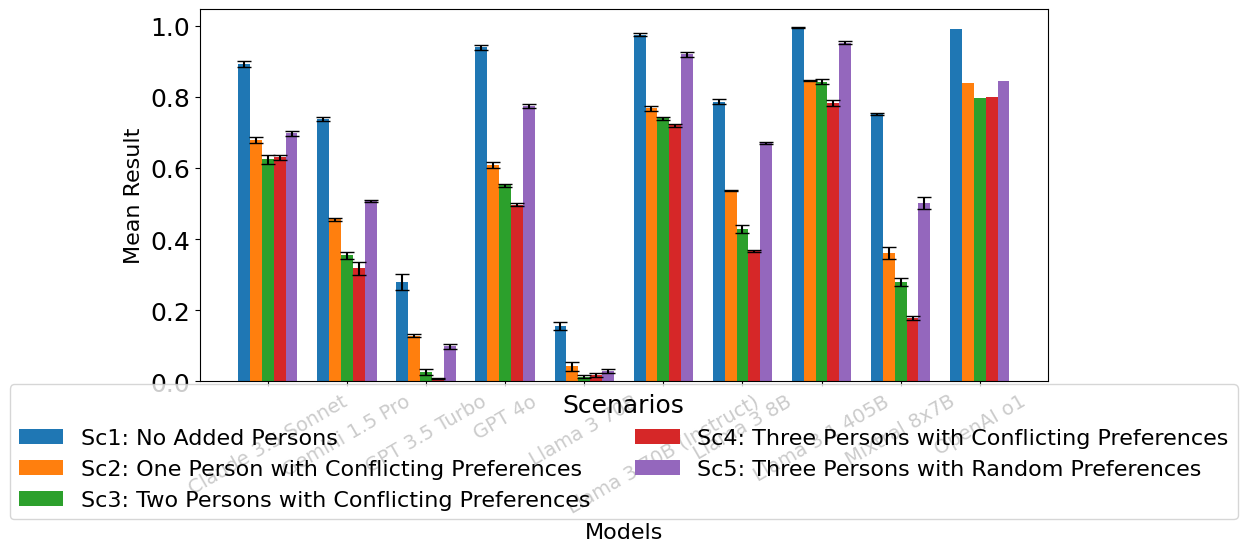

In [11]:

import numpy as np
import matplotlib.pyplot as plt
# Assuming you already have your dataframe 'binary_results'
# Filter for scenarios 1-5
scs = [f'Scenario {i}' for i in range(1, 6)]
scenarios = [
    "Sc1: No Added Persons",
    "Sc2: One Person with Conflicting Preferences",
    "Sc3: Two Persons with Conflicting Preferences",
    "Sc4: Three Persons with Conflicting Preferences",
    "Sc5: Three Persons with Random Preferences"
]
filtered_df = binary_results[binary_results['Scenario'].isin(scs)]

# Calculate mean and standard deviation
grouped = filtered_df.groupby(['Model', 'Scenario', 'File'])['Evaluation Rating'].agg(['mean']).reset_index()

grouped = grouped.groupby(['Model', 'Scenario'])["mean"].agg(['mean', 'std']).reset_index()
# Pivot the data for plotting
pivot_mean = grouped.pivot(index='Model', columns='Scenario', values='mean')
pivot_std = grouped.pivot(index='Model', columns='Scenario', values='std')
pivot_std = pivot_std / np.sqrt(3)
# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(pivot_mean.index))

# Plot bars for each scenario
print(pivot_mean)
for i, scenario in enumerate(scenarios):
    sc = f"Scenario {i+1}"
    plt.bar(index + i*bar_width, pivot_mean[sc], bar_width, 
            yerr=pivot_std[sc], capsize=5, 
            label=scenario)
pivot_mean_renamed = pivot_mean.rename(index={
    "gemini-1.5-pro": "Gemini 1.5 Pro",
    "gpt-3.5-turbo": "GPT 3.5 Turbo",
    "gpt-4o": "GPT 4o",
    "meta/meta-llama-3-70b-instruct": "Llama 3 70B (Instruct)",
    "meta/meta-llama-3.1-405b-instruct": "Llama 3.1 405B",
    "mistralai/mixtral-8x7b-instruct-v0.1": "Mixtral 8x7B",
    "o1-preview": "OpenAI o1",
    "claude-3-5-sonnet-20240620": "Claude 3.5 Sonnet",
    "meta/meta-llama-3-70b": "Llama 3 70B",
    "meta/meta-llama-3-8b-instruct": "Llama 3 8B"
})
# Customize the plot
plt.rcParams['font.size'] = 18
plt.xlabel('Models', fontsize=16)
plt.ylabel('Mean Result', fontsize=16)
# plt.title('Mean and Standard Deviation of Results for Scenarios 1-5 by Model')
plt.xticks(index + bar_width * 2, pivot_mean_renamed.index, ha='center', fontsize=14, rotation=30)
plt.legend(title='Scenarios', ncols=2, bbox_to_anchor=(0.5, -0.4), fontsize=16, loc="lower center")

plt.tight_layout()
plt.savefig("scenarios.pdf", bbox_inches="tight")
plt.show()

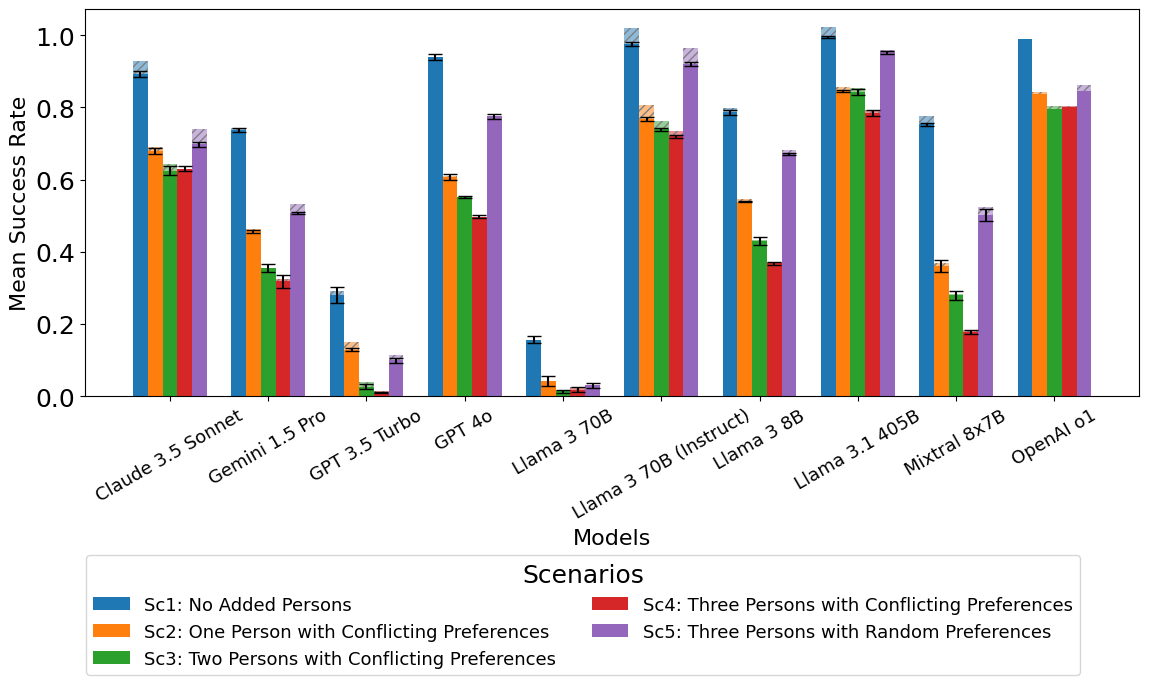

In [23]:
# Assuming you already have your dataframe 'binary_results'
ambiguity = pd.read_csv("ambiguity_stats_full.csv")
# models = [
#     "claude-3-5-sonnet-20240620",
#     "o1-preview",
#     "gemini-1.5-pro",
#     "gpt-3.5-turbo",
#     "meta/meta-llama-3.1-405b-instruct",
#     "gpt-4o",
# ]
# ambiguity_models = [
#     "claude-3-5-sonnet-20240620",
#     "o1-preview",
#     "Gemini 1.5 Pro",
#     "GPT 3.5 Turbo",
#     "Llama 3.1 405B",
#     "GPT 4o",
# ]
# # print(ambiguity)
# ambiguity = ambiguity[ambiguity["Model"].isin(ambiguity_models)]
# # # Filter for scenarios 1-5

scenarios = [f"Scenario {i}" for i in range(1, 6)]
scs = [
    "Sc1: No Added Persons",
    "Sc2: One Person with Conflicting Preferences",
    "Sc3: Two Persons with Conflicting Preferences",
    "Sc4: Three Persons with Conflicting Preferences",
    "Sc5: Three Persons with Random Preferences",
]
filtered_df = binary_results[(binary_results['Scenario'].isin(scenarios))] #& (binary_results["Model"].isin(models))]

# Calculate mean and standard deviation
grouped = filtered_df.groupby(['Model', 'Scenario', 'File'])['Evaluation Rating'].agg(['mean']).reset_index()
grouped = grouped.groupby(['Model', 'Scenario'])["mean"].agg(['mean', 'std']).reset_index()

# Pivot the data for plotting
pivot_mean = grouped.pivot(index='Model', columns='Scenario', values='mean')
pivot_std = grouped.pivot(index='Model', columns='Scenario', values='std')
pivot_std = pivot_std / np.sqrt(3)
# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(pivot_mean.index))

# Plot bars for each scenario
for i, scenario in enumerate(scenarios):
    plt.bar(index + i*bar_width, pivot_mean[scenario], bar_width, 
            yerr=pivot_std[scenario], capsize=5, 
            label=scs[i])


    # Change alpha for opacity. Change hatch for stripes effect.
    # set hatch color
    import matplotlib
    matplotlib.rcParams['hatch.color'] = 'grey'
    ambiguity_data = ambiguity.set_index('Model')[scenario] / 100
    plt.bar(index + i*bar_width, ambiguity_data, bar_width, 
            bottom=pivot_mean[scenario], alpha=0.5, color=f"C{i}", hatch='////')

pivot_mean_renamed = pivot_mean.rename(index={
    "gemini-1.5-pro": "Gemini 1.5 Pro",
    "gpt-3.5-turbo": "GPT 3.5 Turbo",
    "gpt-4o": "GPT 4o",
    "meta/meta-llama-3-70b-instruct": "Llama 3 70B (Instruct)",
    "meta/meta-llama-3.1-405b-instruct": "Llama 3.1 405B",
    "mistralai/mixtral-8x7b-instruct-v0.1": "Mixtral 8x7B",
    "o1-preview": "OpenAI o1",
    "claude-3-5-sonnet-20240620": "Claude 3.5 Sonnet",
    "meta/meta-llama-3-70b": "Llama 3 70B",
    "meta/meta-llama-3-8b-instruct": "Llama 3 8B"
    })
# Customize the plot
plt.rcParams['font.size'] = 18
plt.xlabel('Models', fontsize=16)
plt.ylabel('Mean Success Rate', fontsize=16)
# plt.title('Mean and Standard Deviation of Results for Scenarios 1-5 by Model')
plt.xticks(index + bar_width * 2, pivot_mean_renamed.index, ha='center', fontsize=13, rotation=30)
plt.legend(title='Scenarios', ncols=2, bbox_to_anchor=(0.5, -0.17), bbox_transform=plt.gcf().transFigure, fontsize=13, loc="lower center")

plt.tight_layout()
plt.savefig("scenarios_with_ambiguity_all.pdf", bbox_inches="tight")
plt.show()

In [22]:
pivot_mean[scenario]

Model
gemini-1.5-pro                          0.507517
gpt-3.5-turbo                           0.099067
gpt-4o                                  0.775040
meta/meta-llama-3-70b-instruct          0.920412
meta/meta-llama-3.1-405b-instruct       0.952381
mistralai/mixtral-8x7b-instruct-v0.1    0.502157
Name: Scenario 5, dtype: float64

In [23]:
ambiguity_data

Model
GPT 3.5 Turbo     0.028684
GPT 4o            0.011869
Gemini 1.5 Pro    0.008902
Llama 3 70B       0.004451
Llama 3.1 405B    0.000000
Mixtral 8x7B      0.039565
Name: Scenario 5, dtype: float64

## Ablations

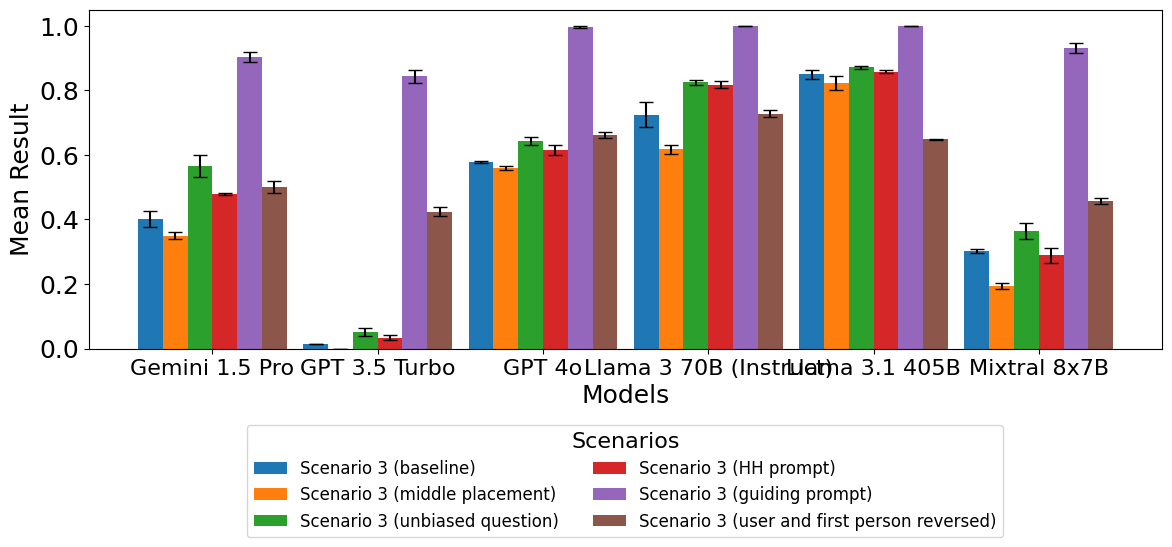

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have your dataframe 'binary_results'

# Filter for scenarios 1-5
scenarios = [
    "Scenario 3 (baseline)",
    "Scenario 3 (middle placement)",
    "Scenario 3 (unbiased question)",
    "Scenario 3 (HH prompt)",
    "Scenario 3 (guiding prompt)",
    "Scenario 3 (user and first person reversed)",
]
filtered_df = binary_results[binary_results["Scenario"].isin(scenarios)]

# Calculate mean and standard deviation
grouped = (
    filtered_df.groupby(["Model", "Scenario", "File"])["Evaluation Rating"]
    .agg(["mean"])
    .reset_index()
)

grouped = (
    grouped.groupby(["Model", "Scenario"])["mean"].agg(["mean", "std"]).reset_index()
)
# Pivot the data for plotting
pivot_mean = grouped.pivot(index="Model", columns="Scenario", values="mean")
pivot_std = grouped.pivot(index="Model", columns="Scenario", values="std")
pivot_std = pivot_std / np.sqrt(3)
# Set up the plot
plt.figure(figsize=(12, 6))
bar_width = 0.15
index = np.arange(len(pivot_mean.index))

# Plot bars for each scenario
for i, scenario in enumerate(scenarios):
    plt.bar(
        index + i * bar_width,
        pivot_mean[scenario],
        bar_width,
        yerr=pivot_std[scenario],
        capsize=5,
        label=scenario,
    )
pivot_mean_renamed = pivot_mean.rename(
    index={
        "gemini-1.5-pro": "Gemini 1.5 Pro",
        "gpt-3.5-turbo": "GPT 3.5 Turbo",
        "gpt-4o": "GPT 4o",
        "meta/meta-llama-3-70b-instruct": "Llama 3 70B (Instruct)",
        "meta/meta-llama-3.1-405b-instruct": "Llama 3.1 405B",
        "mistralai/mixtral-8x7b-instruct-v0.1": "Mixtral 8x7B",
        "o1-preview": "OpenAI o1",
        "claude-3-5-sonnet-20240620": "Claude 3.5 Sonnet",
        "meta/meta-llama-3-70b": "Llama 3 70B",
        "meta/meta-llama-3-8b-instruct": "Llama 3 8B",
    }
)
# Customize the plot
plt.rcParams["font.size"] = 16
plt.xlabel("Models")
plt.ylabel("Mean Result")
# plt.title('Mean and Standard Deviation of Results for Scenarios 1-5 by Model')
plt.xticks(index + 2.5 * bar_width, pivot_mean_renamed.index, ha="center", fontsize=16, rotation=0)
plt.legend(title="Scenarios", ncols=2, bbox_to_anchor=(0.86, -0.2), fontsize=12, loc="best")

plt.tight_layout()
plt.savefig("ablations.pdf", bbox_inches="tight")
plt.show()

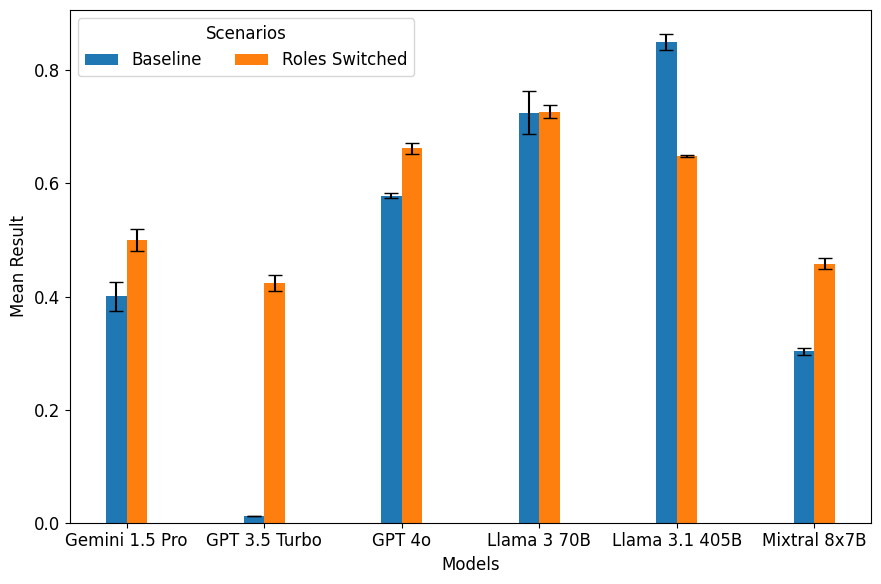

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming you already have your dataframe 'binary_results'

# Filter for scenarios 1-5
scenarios = [
    "Scenario 3 (baseline)",
    # "Scenario 3 (middle placement)",
    # "Scenario 3 (unbiased question)",
    # "Scenario 3 (HH prompt)",
    # "Scenario 3 (guiding prompt)",
    "Scenario 3 (user and first person reversed)",
]
filtered_df = binary_results[binary_results["Scenario"].isin(scenarios)]

# Calculate mean and standard deviation
grouped = (
    filtered_df.groupby(["Model", "Scenario", "File"])["Evaluation Rating"]
    .agg(["mean"])
    .reset_index()
)

grouped = (
    grouped.groupby(["Model", "Scenario"])["mean"].agg(["mean", "std"]).reset_index()
)
# Pivot the data for plotting
pivot_mean = grouped.pivot(index="Model", columns="Scenario", values="mean")
pivot_std = grouped.pivot(index="Model", columns="Scenario", values="std")
pivot_std = pivot_std / np.sqrt(3)
# Set up the plot
plt.figure(figsize=(9, 6))
bar_width = 0.15
index = np.arange(len(pivot_mean.index))

# Plot bars for each scenario
labels_map = {
    "Scenario 3 (baseline)": "Baseline",
    "Scenario 3 (middle placement)": "Middle Placement",
    "Scenario 3 (unbiased question)": "Unbiased Question",
    "Scenario 3 (HH prompt)": "HH Prompt",
    "Scenario 3 (guiding prompt)": "Guiding Prompt",
    "Scenario 3 (user and first person reversed)": "Roles Switched",
}
for i, scenario in enumerate(scenarios):
    
    plt.bar(
        index + i * bar_width,
        pivot_mean[scenario],
        bar_width,
        yerr=pivot_std[scenario],
        capsize=5,
        label=labels_map[scenario],
    )
pivot_mean_renamed = pivot_mean.rename(
    index={
        "gemini-1.5-pro": "Gemini 1.5 Pro",
        "gpt-3.5-turbo": "GPT 3.5 Turbo",
        "gpt-4o": "GPT 4o",
        "meta/meta-llama-3-70b-instruct": "Llama 3 70B",
        "meta/meta-llama-3.1-405b-instruct": "Llama 3.1 405B",
        "mistralai/mixtral-8x7b-instruct-v0.1": "Mixtral 8x7B",
    }
)
# Customize the plot
plt.rcParams["font.size"] = 12
plt.xlabel("Models")
plt.ylabel("Mean Result")
# plt.title('Mean and Standard Deviation of Results for Scenarios 1-5 by Model')
plt.xticks(index + 0.5 * bar_width, pivot_mean_renamed.index, ha="center", fontsize=12)
plt.legend(
    title="Scenarios", ncols=3, fontsize=12, loc="upper left"
)

plt.tight_layout()
plt.savefig("ablations_switch_roles.pdf", bbox_inches="tight")
plt.show()


In [2]:
from eval import create_visualizations

create_visualizations(binary_results)

/Users/benellis/opt/anaconda3/envs/llm_prag_benchmark/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Figure size 1500x800 with 0 Axes>

<Figure size 1500x800 with 0 Axes>